In [1]:
import pandas as pd

In [2]:
dataset = pd.read_json("Sarcasm_Headlines_Dataset.json",lines = True)

In [3]:
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
dataset = dataset.drop(["article_link"], axis = 1)

In [5]:
dataset.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
import nltk
from nltk.corpus import stopwords

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/turjoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.stem import PorterStemmer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [10]:
corpus = []
for i in range(0,26709):
    headline = re.sub('[^a-zA-Z]',' ',dataset['headline'][i])
    headline = headline.lower()
    headline = headline.split()
    ps = PorterStemmer()
    headline = [ps.stem(word) for word in headline if not word in set(stopwords.words('english')) ]
    headline = ' '.join(headline)
    corpus.append(headline)

In [11]:
print (corpus)

['former versac store clerk sue secret black code minor shopper', 'roseann reviv catch thorni polit mood better wors', 'mom start fear son web seri closest thing grandchild', 'boehner want wife listen come altern debt reduct idea', 'j k rowl wish snape happi birthday magic way', 'advanc world women', 'fascin case eat lab grown meat', 'ceo send kid school work compani', 'top snake handler leav sink huckabe campaign', 'friday morn email insid trump presser age', 'airlin passeng tackl man rush cockpit bomb threat', 'facebook reportedli work healthcar featur app', 'north korea prais trump urg us voter reject dull hillari', 'actual cnn jeffrey lord indefens', 'barcelona hold huge protest support refuge', 'nuclear bomb deton rehears spider man music', 'cosbi lawyer ask accus come forward smear legal team year ago', 'stock analyst confus frighten boar market', 'bloomberg program build better citi got bigger', 'craig hick indict', 'courtroom sketch artist clear manga influenc', 'trump assur na

In [12]:
cv = CountVectorizer(max_features = 3000)
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

In [13]:
print (x)
print (y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 1 ... 0 0 0]


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 26)

In [16]:
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB

In [17]:
clf = naive_bayes.MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
import pylab as pl
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix


[[2363  649]
 [ 601 1729]]


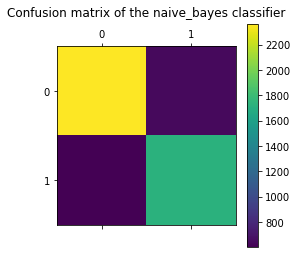

In [19]:
y_expect = y_test
y_predict = clf.predict(x_test)
cm = confusion_matrix(y_expect, y_predict)
pl.matshow(cm)
print (cm)
pl.title('Confusion matrix of the naive_bayes classifier\n')
pl.colorbar()
pl.show()


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_expect,y_predict))
print (accuracy_score(y_expect, y_predict)*100)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3012
           1       0.73      0.74      0.73      2330

   micro avg       0.77      0.77      0.77      5342
   macro avg       0.76      0.76      0.76      5342
weighted avg       0.77      0.77      0.77      5342

76.60052414825907


In [21]:
import numpy as np

In [22]:
review_array=np.array(["Fun Toy Banned Because of Three Stupid Dead Kids"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["Shirtless Biden Washes Trans Am in White House Driveway"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["Pope Francis Worried About Job Security After Butting Heads With New God"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["Hijackers Surprised to Find Selves in Hell"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["Evangelical Scientists Refute Gravity With New 'Intelligent Falling' Theory"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["Shirtless Biden Washes Trans Am in White House Driveway"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["Report: Unemployment High Because People Keep Blowing Their Job Interviews"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["N.C. hospital delivering blood with drones in pioneering medical program"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["DOJ charges two people with economic espionage to benefit China"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))
review_array=np.array(["Maryland joins Virginia in raising smoking age to 21"])
review_vector = cv.transform(review_array )
print (clf.predict(review_vector))


[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[0]


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf_tree = DecisionTreeClassifier(random_state = 26,max_depth = 3,min_samples_leaf = 1)
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=26,
            splitter='best')

[[2942   70]
 [2016  314]]


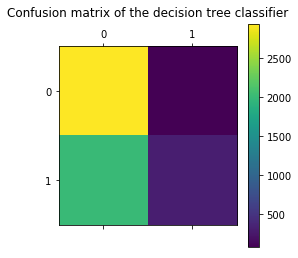

In [25]:
y_expect = y_test
y_predict_tree = clf_tree.predict(x_test)
cmt = confusion_matrix(y_expect, y_predict_tree)
pl.matshow(cmt)
print (cmt)
pl.title('Confusion matrix of the decision tree classifier\n')
pl.colorbar()
pl.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_expect,y_predict_tree))
print (accuracy_score(y_expect, y_predict_tree)*100)

              precision    recall  f1-score   support

           0       0.59      0.98      0.74      3012
           1       0.82      0.13      0.23      2330

   micro avg       0.61      0.61      0.61      5342
   macro avg       0.71      0.56      0.48      5342
weighted avg       0.69      0.61      0.52      5342

60.95095469861476


In [27]:
from sklearn.tree import export_graphviz

In [28]:
export_graphviz(clf_tree,out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [29]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

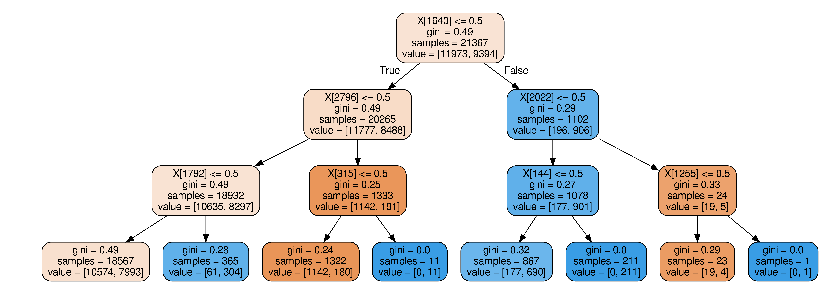

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [31]:
review_array=np.array(["Fun Toy Banned Because of Three Stupid Dead Kids"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["Shirtless Biden Washes Trans Am in White House Driveway"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["Pope Francis Worried About Job Security After Butting Heads With New God"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["Hijackers Surprised to Find Selves in Hell"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["Evangelical Scientists Refute Gravity With New 'Intelligent Falling' Theory"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["Shirtless Biden Washes Trans Am in White House Driveway"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["Report: Unemployment High Because People Keep Blowing Their Job Interviews"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["N.C. hospital delivering blood with drones in pioneering medical program"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["DOJ charges two people with economic espionage to benefit China"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))
review_array=np.array(["Maryland joins Virginia in raising smoking age to 21"])
review_vector = cv.transform(review_array )
print (clf_tree.predict(review_vector))

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [33]:
classifier = Sequential()
classifier.add(Dense(1500,kernel_initializer = 'uniform',activation='relu',input_dim=3000))
classifier.add(Dense(750,kernel_initializer = 'uniform',activation='relu'))
classifier.add(Dense(375, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(188, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(94, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(47, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(24, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(12, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [34]:
classifier.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train,epochs=10,batch_size=50)

Epoch 1/10
21367/21367 [==============================] - 83s 4ms/step - loss: 0.5596 - acc: 0.6898
Epoch 2/10
21367/21367 [==============================] - 84s 4ms/step - loss: 0.3648 - acc: 0.8376
Epoch 3/10
21367/21367 [==============================] - 82s 4ms/step - loss: 0.1587 - acc: 0.9353
Epoch 4/10
21367/21367 [==============================] - 93s 4ms/step - loss: 0.0334 - acc: 0.9874
Epoch 5/10
21367/21367 [==============================] - 89s 4ms/step - loss: 0.0109 - acc: 0.9956
Epoch 6/10
21367/21367 [==============================] - 88s 4ms/step - loss: 0.0072 - acc: 0.9970
Epoch 7/10
21367/21367 [==============================] - 93s 4ms/step - loss: 0.0063 - acc: 0.9969
Epoch 8/10
21367/21367 [==============================] - 86s 4ms/step - loss: 0.0060 - acc: 0.9970
Epoch 9/10
21367/21367 [==============================] - 85s 4ms/step - loss: 0.0087 - acc: 0.9967
Epoch 10/10
21367/21367 [==============================] - 98s 5ms/step - loss: 0.0073 - acc: 0.9966

[[2527  485]
 [ 674 1656]]


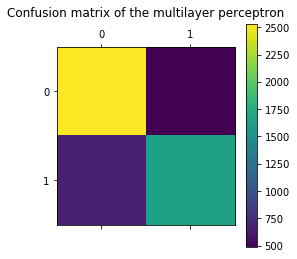

In [35]:
y_expect = y_test
y_predict_mlp = classifier.predict(x_test)
y_predict_mlp = (y_predict_mlp > 0.5)
cmn = confusion_matrix(y_expect, y_predict_mlp)
pl.matshow(cmn)
print (cmn)
pl.title('Confusion matrix of the multilayer perceptron\n')
pl.colorbar()
pl.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_expect,y_predict_mlp))
print (accuracy_score(y_expect, y_predict_mlp)*100)

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      3012
           1       0.77      0.71      0.74      2330

   micro avg       0.78      0.78      0.78      5342
   macro avg       0.78      0.77      0.78      5342
weighted avg       0.78      0.78      0.78      5342

78.30400599026581


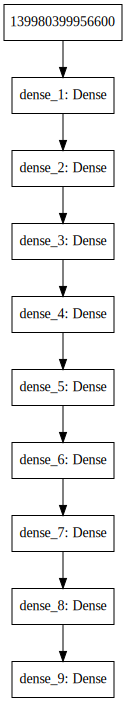

In [37]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(classifier).create(prog='dot', format='svg'))

In [38]:
review_array=np.array(["Fun Toy Banned Because of Three Stupid Dead Kids"])
review_vector = cv.transform(review_array )
print (classifier.predict(review_vector).round())
review_array=np.array(["Shirtless Biden Washes Trans Am in White House Driveway"])
review_vector = cv.transform(review_array )
print (classifier.predict(review_vector).round())
review_array=np.array(["Pope Francis Worried About Job Security After Butting Heads With New God"])
review_vector = cv.transform(review_array )
print (classifier.predict(review_vector).round())
review_array=np.array(["Hijackers Surprised to Find Selves in Hell"])
review_vector = cv.transform(review_array )
print (classifier.predict(review_vector).round())
review_array=np.array(["Evangelical Scientists Refute Gravity With New 'Intelligent Falling' Theory"])
review_vector = cv.transform(review_array )
print (classifier.predict(review_vector).round())
review_array=np.array(["Shirtless Biden Washes Trans Am in White House Driveway"])
review_vector = cv.transform(review_array )
print (classifier.predict(review_vector).round())
review_array=np.array(["Report: Unemployment High Because People Keep Blowing Their Job Interviews"])
review_vector = cv.transform(review_array )
print (classifier.predict(review_vector).round())
review_array=np.array(["N.C. hospital delivering blood with drones in pioneering medical program"])
review_vector = cv.transform(review_array )
print (classifier.predict(review_vector).round())
review_array=np.array(["DOJ charges two people with economic espionage to benefit China"])
review_vector = cv.transform(review_array )
print (classifier.predict(review_vector).round())
review_array=np.array(["Maryland joins Virginia in raising smoking age to 21"])
review_vector = cv.transform(review_array )
print (classifier.predict(review_vector).round())

[[1.]]
[[0.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
